# Plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 50

## Single Atom Analytical

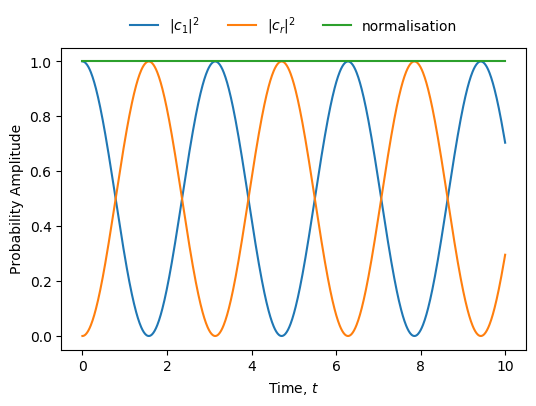

In [3]:
from singleatom_analytical import solve_with as singleatom_analytical

t, cs = singleatom_analytical()
plt.plot(t, np.abs(cs[:, 0])**2, label='$|c_1|^2$')
plt.plot(t, np.abs(cs[:, 1])**2, label='$|c_r|^2$')
plt.plot(t, np.sum(np.abs(cs)**2, axis=1), label='normalisation')

plt.xlabel('Time, $t$')
plt.ylabel('Probability Amplitude')
plt.legend(frameon=False, ncol=5, loc='upper center',
           bbox_to_anchor=(0.5, 1.15))

## Single Atom Numerical

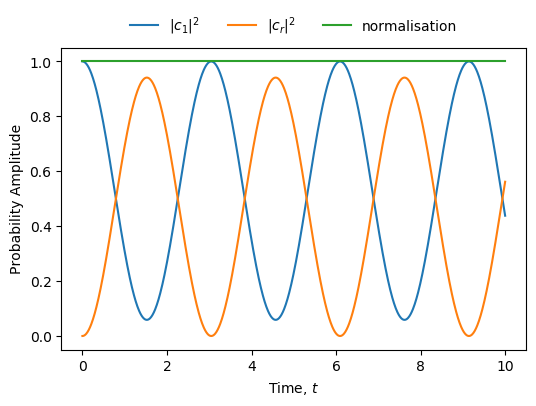

In [4]:
from singleatom_numerical import solve_with as singleatom_numerical

sol = singleatom_numerical()

# Plotting modulus square of c1, cr
plt.plot(sol.t, np.abs(sol.y[0])**2, label='$|c_1|^2$')
plt.plot(sol.t, np.abs(sol.y[1])**2, label='$|c_r|^2$')

# Normalisation
plt.plot(sol.t, np.abs(sol.y[0])**2 +
         np.abs(sol.y[1])**2, label='normalisation')

plt.xlabel('Time, $t$')
plt.ylabel('Probability Amplitude')
plt.legend(frameon=False, ncol=5, loc='upper center',
           bbox_to_anchor=(0.5, 1.15))

## Single Atom Comparison

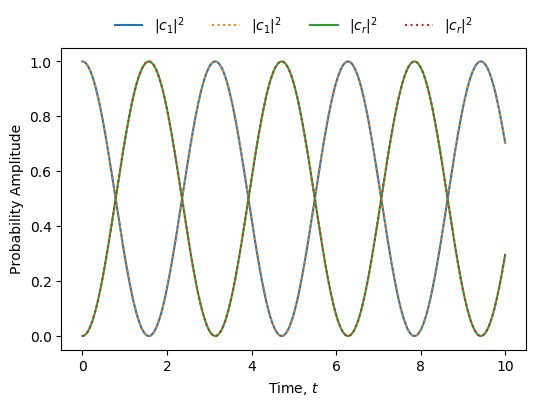

In [5]:
from singleatom_analytical import solve_with as singleatom_analytical
from singleatom_numerical import solve_with as singleatom_numerical

t, cs = singleatom_analytical(laser_freq=1, detuning=0)
sol = singleatom_numerical(laser_freq=1, detuning=0)

plt.plot(t, np.abs(cs[:, 0])**2, label='$|c_1|^2$')
plt.plot(sol.t, np.abs(sol.y[0])**2, label='$|c_1|^2$', ls=':')
plt.plot(t, np.abs(cs[:, 1])**2, label='$|c_r|^2$')
plt.plot(sol.t, np.abs(sol.y[1])**2, label='$|c_r|^2$', ls=':')

plt.xlabel('Time, $t$')
plt.ylabel('Probability Amplitude')
plt.legend(frameon=False, ncol=5, loc='upper center',
           bbox_to_anchor=(0.5, 1.15))

## Two Atom Numerical without Interaction

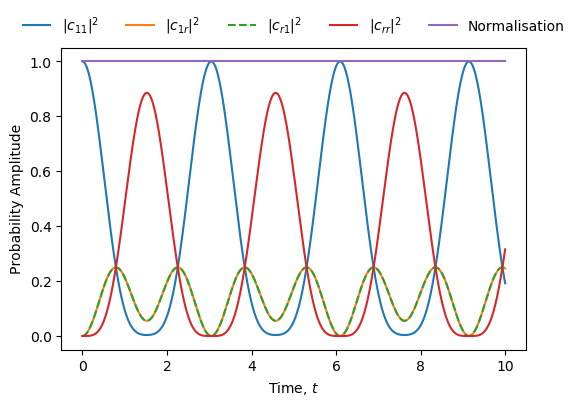

In [6]:
from twoatom_numerical import solve_with as twoatom

sol = twoatom(V=0)

plt.plot(sol.t, np.abs(sol.y[0])**2, label='$|c_{11}|^2$')
plt.plot(sol.t, np.abs(sol.y[1])**2, label='$|c_{1r}|^2$')
plt.plot(sol.t, np.abs(sol.y[2])**2, label='$|c_{r1}|^2$', linestyle='--')
plt.plot(sol.t, np.abs(sol.y[3])**2, label='$|c_{rr}|^2$')

norm = (np.abs(sol.y[0])**2
        + np.abs(sol.y[2])**2
        + np.abs(sol.y[3])**2
        + np.abs(sol.y[1])**2)
plt.plot(sol.t, norm, label='Normalisation')

plt.xlabel('Time, $t$')
plt.ylabel('Probability Amplitude')
plt.legend(frameon=False, ncol=5, loc='upper center',
           bbox_to_anchor=(0.5, 1.15))

## Two Atom Numerical with Interaction

In [7]:
from twoatom_numerical import solve_with as twoatom

def plot(sol):
    # Individual Prob. Amps
    plt.plot(sol.t, np.abs(sol.y[0])**2, label='$|c_{11}|^2$')
    plt.plot(sol.t, np.abs(sol.y[1])**2, label='$|c_{1r}|^2$')
    plt.plot(sol.t, np.abs(sol.y[2])**2, label='$|c_{r1}|^2$', linestyle='--')
    plt.plot(sol.t, np.abs(sol.y[3])**2, label='$|c_{rr}|^2$')

    norm = (np.abs(sol.y[0])**2
            + np.abs(sol.y[2])**2
            + np.abs(sol.y[3])**2
            + np.abs(sol.y[1])**2)
    plt.plot(sol.t, norm, label='Normalisation')

    plt.xlabel('Time, $t$')
    plt.ylabel('Probability Amplitude')
    plt.legend(frameon=False, ncol=5, loc='upper center',
            bbox_to_anchor=(0.5, 1.15))

### $V=0$

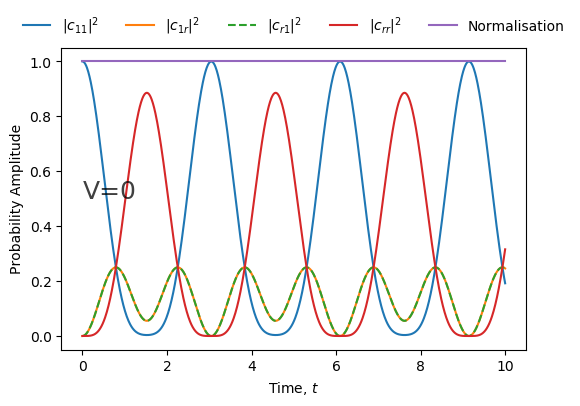

In [8]:
V=0
sol = twoatom(V=V)
plot(sol)
plt.text(0, 0.5, f'V={V}', fontsize=18, alpha=.75)
plt.savefig(f'twoatom/V{V}.png', dpi=160)

### $V=0.5$

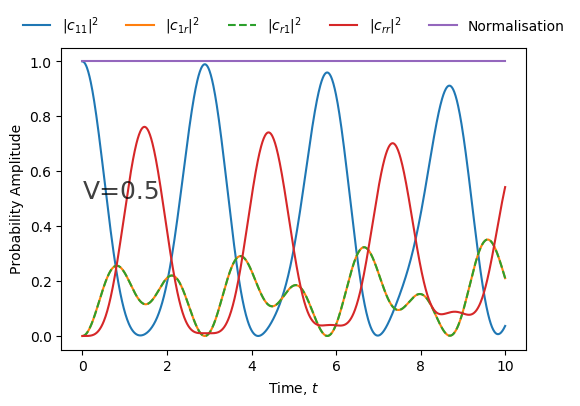

In [9]:
V = .5
sol = twoatom(V=V)
plot(sol)
plt.text(0, 0.5, f'V={V}', fontsize=18, alpha=.75)
plt.savefig(f'twoatom/V{V}.png', dpi=160)

### $V=1$

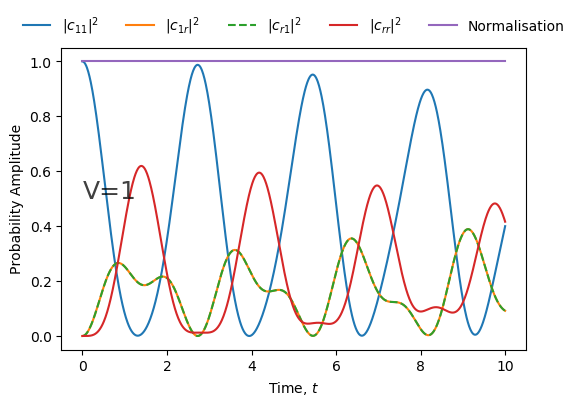

In [10]:
V = 1
sol = twoatom(V=V)
plot(sol)
plt.text(0, 0.5, f'V={V}', fontsize=18, alpha=.75)
plt.savefig(f'twoatom/V{V}.png', dpi=160)

$V = 3$

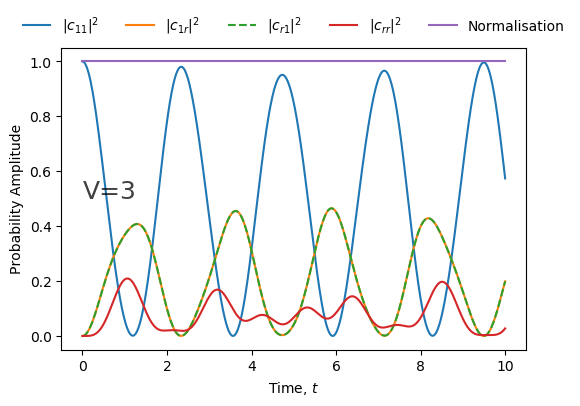

In [11]:
V = 3
sol = twoatom(V=V)
plot(sol)
plt.text(0, 0.5, f'V={V}', fontsize=18, alpha=.75)
plt.savefig(f'twoatom/V{V}.png', dpi=160)

## Two Atom Numerical with Interaction & Time Dependant Rabi Frequency

### $\Omega = \Omega_0\sin^2(t/T)$

$\Omega_0=1,\ T=10$

In [12]:
from twoatom_numerical import solve_with as twoatom, sine_squared
from functools import partial

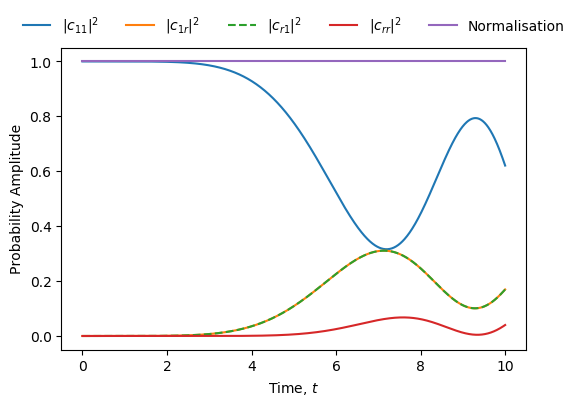

In [13]:
sol = twoatom(laser=partial(sine_squared, 1, 10))
plot(sol)

$\Omega_0=1,\ T=5$

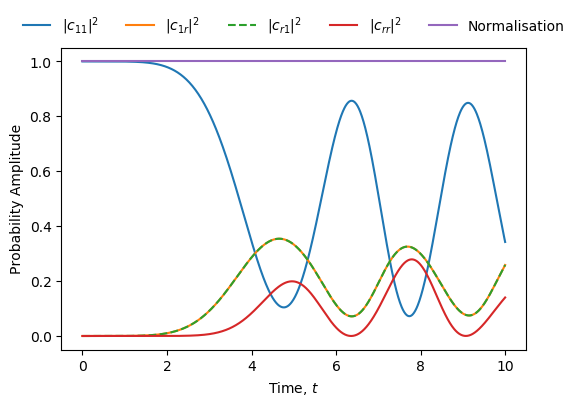

In [14]:
sol = twoatom(laser=partial(sine_squared, 1, 5))
plot(sol)

$\Omega_0=2,\ T=5$

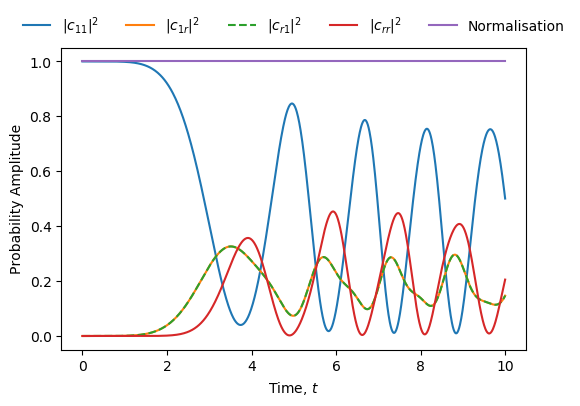

In [15]:
sol = twoatom(laser=partial(sine_squared, 2, 5))
plot(sol)

In [23]:
def plot(sol):
    # Individual Prob. Amps
    plt.plot(sol.t, np.angle(sol.y[0]) - np.angle(sol.y[1]), label='$arg(c_{11}) - arg(c_{1r})$')
    plt.plot(sol.t, np.angle(sol.y[1]) - 2 * np.angle(sol.y[2]), label='$arg(c_{1r}) - 2arg(c_{r1})$')

    plt.xlabel('Time, $t$')
    plt.ylabel('Probability Amplitude')
    plt.legend(frameon=False, ncol=5, loc='upper center',
            bbox_to_anchor=(0.5, 1.15))

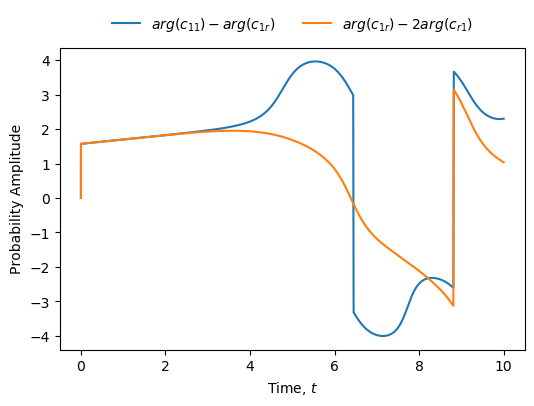

In [24]:
sol = twoatom(laser=partial(sine_squared, 0.1, 114.85/0.1), detuning_1=)
plot(sol)